In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('/content/NHANES.csv')

In [2]:
df.head()

,SequenceNo,age_group,RespondentAge,RespondentGender,Sports&FitnessEngagement,RespondentBMI,RespBloodGlucoseAfterFasting,DiabeticStatus,RespondentOral,RespBloodInsulinLevels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92


In [5]:
"""## **Data Wrangling**"""

#Check for missing Values
df.isnull().sum()
#no need of dropping any columns
#since no column had missing data

,0
SequenceNo,0
age_group,0
RespondentAge,0
RespondentGender,0
Sports&FitnessEngagement,0
RespondentBMI,0
RespBloodGlucoseAfterFasting,0
DiabeticStatus,0
RespondentOral,0
RespBloodInsulinLevels,0


In [ ]:
# Display the data types
df.dtypes

,0
SequenceNo,int64
age_group,object
RespondentAge,int64
RespondentGender,int64
Sports&FitnessEngagement,int64
RespondentBMI,float64
RespBloodGlucoseAfterFasting,int64
DiabeticStatus,int64
RespondentOral,int64
RespBloodInsulinLevels,float64


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])

# new display the data types
df.dtypes

,0
SequenceNo,int64
age_group,int64
RespondentAge,int64
RespondentGender,int64
Sports&FitnessEngagement,int64
RespondentBMI,float64
RespBloodGlucoseAfterFasting,int64
DiabeticStatus,int64
RespondentOral,int64
RespBloodInsulinLevels,float64


In [9]:
df.shape

(2278, 10)

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


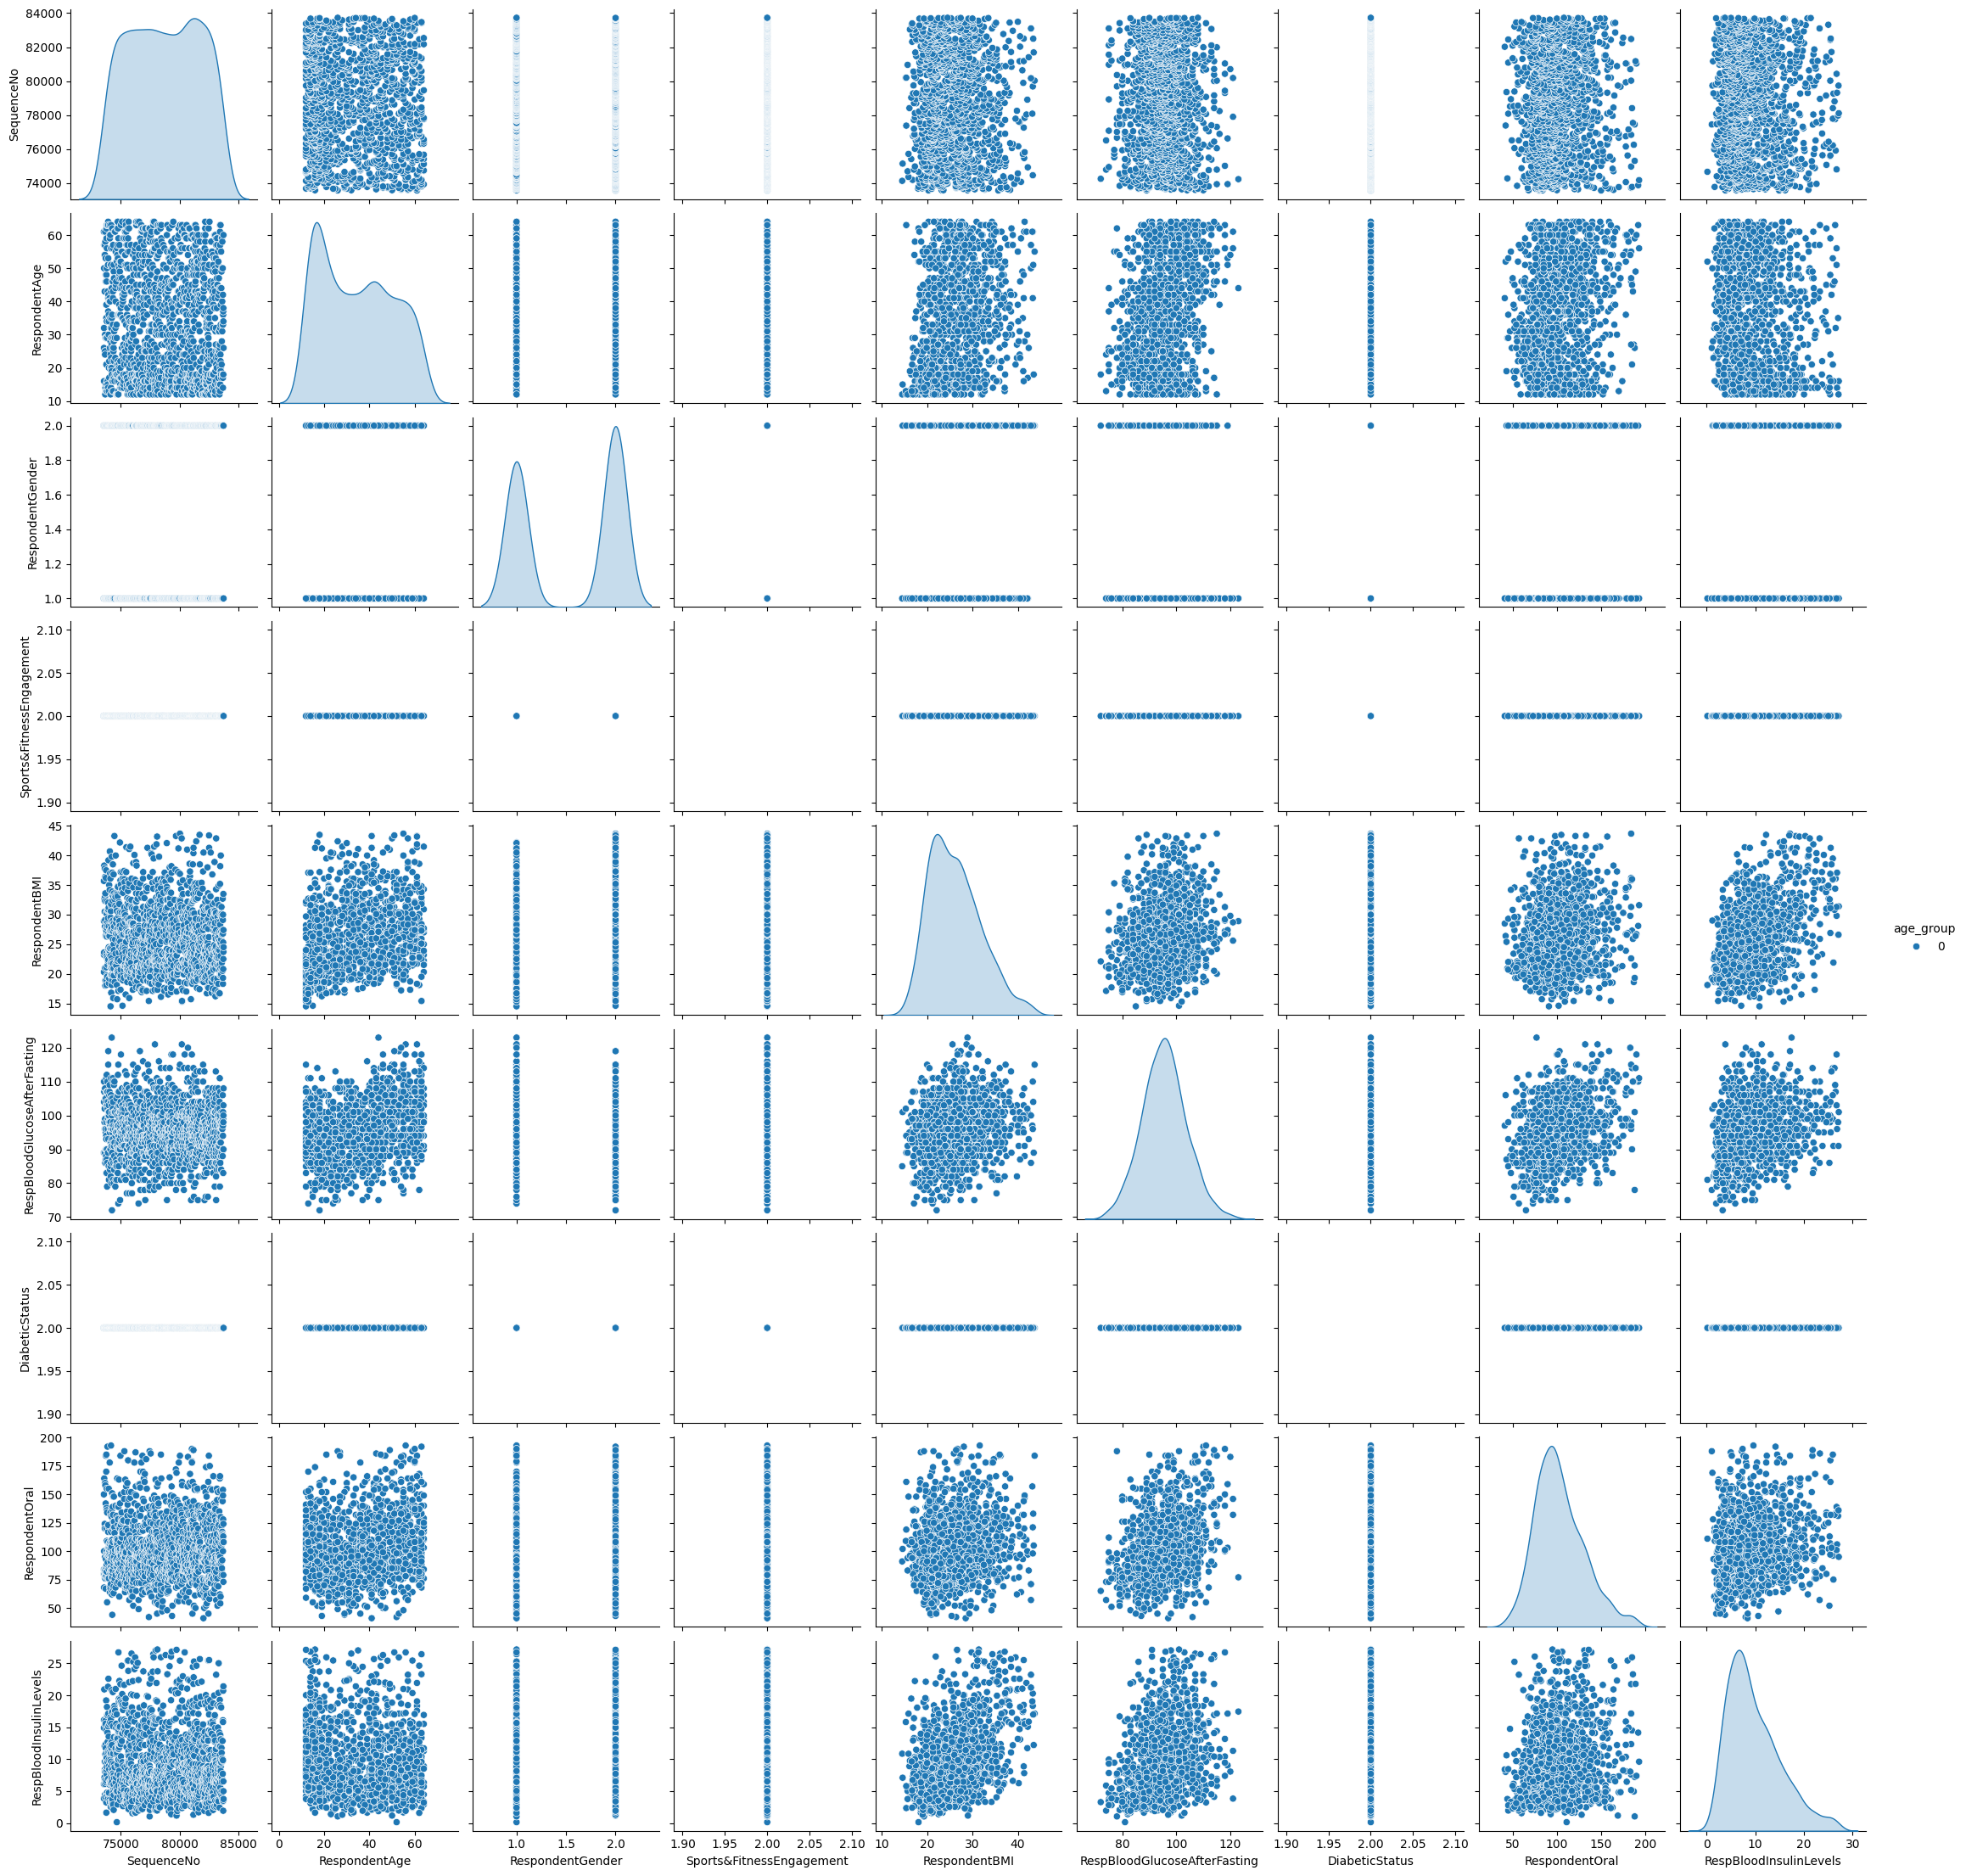

In [13]:
sns.pairplot(df, hue='age_group')
plt.show()


In [ ]:
# Count the number of Adults and Seniors in the age_group column
age_group_counts = df['age_group'].value_counts()

# Extract counts for Adults and Seniors
adults_count = age_group_counts.get('Adult', 0)
seniors_count = age_group_counts.get('Senior', 0)

# Print the results
print(f"Number of Adults: {adults_count}")
print(f"Number of Seniors: {seniors_count}")

# Filter for females (assuming 1 represents females)
females_df = df[df['RespondentGender'] == 1]  # Change 'gender' to the actual column name if different
males_df = df[df['RespondentGender'] == 2]

# Print the number of females
number_of_females = females_df.shape[0]
print(f"Number of Females: {number_of_females}")

# Print the number of males
number_of_males = males_df.shape[0]
print(f"Number of males: {number_of_males}")

Number of Adults: 1914
Number of Seniors: 364
Number of Females: 1113
Number of males: 1165


In [ ]:
# Filter the dataset for adults
# Assuming 'Adults' is the label used in the age_group column
adults_df = df[df['age_group'] == 'Adult']

# Print the results
print(f"Number of Adults: {adults_count}")

# Get the minimum and maximum age for age group adults
min_age = adults_df['RespondentAge'].min()
max_age = adults_df['RespondentAge'].max()

# Print the results
print(f"Minimum Age for Adults: {min_age}")
print(f"Maximum Age for Adults: {max_age}")

# Calculate the average age for adults
average_age = adults_df['RespondentAge'].mean()

# Print the result
print(f"Average Age for Adults: {average_age:.2f}")

# Filter for females (assuming 1 represents females)
Adult_females_df = df[df['RespondentGender'] == 1]  # Change 'gender' to the actual column name if different
Adult_males_df = df[df['RespondentGender'] == 2]


Number of Adults: 1914
Minimum Age for Adults: 12
Maximum Age for Adults: 64
Average Age for Adults: 35.78


In [ ]:
# Filter the dataset for adults
# Assuming 'Adults' is the label used in the age_group column
seniors_df = df[df['age_group'] == 'Senior']

# Calculate the average age for adults
average_age = seniors_df['RespondentAge'].mean()

# Get the minimum and maximum age for age group adults
min_age = seniors_df['RespondentAge'].min()
max_age = seniors_df['RespondentAge'].max()

#Print the total number of seniors
print(f"Number of Seniors: {seniors_count}")

# Print the results
print(f"Minimum Age for Seniors: {min_age}")
print(f"Maximum Age for Seniors: {max_age}")

# Print the result
print(f"Average Age for Seniors: {average_age:.2f}")

Number of Seniors: 364
Minimum Age for Seniors: 65
Maximum Age for Seniors: 80
Average Age for Seniors: 73.43


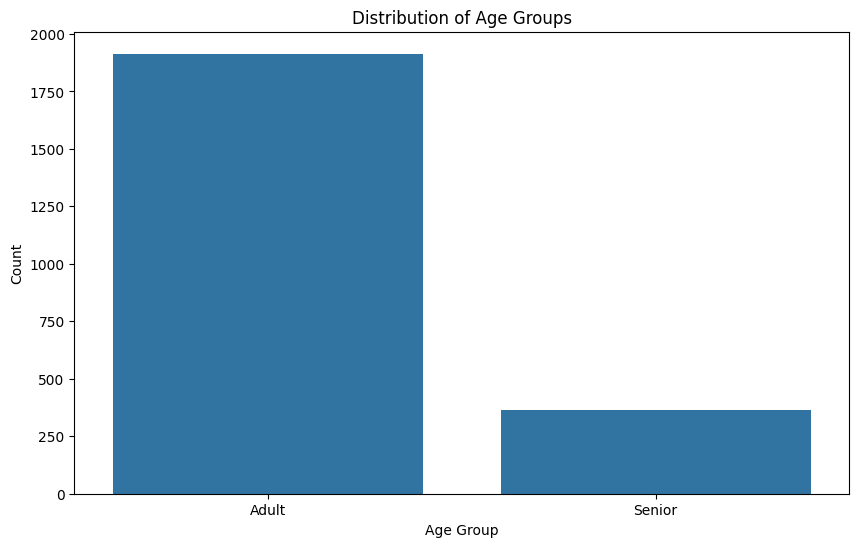

In [ ]:
#question 1: What is the distribution of respondents across different age groups?
#Distribution of Age Groups
# Count the number of individuals in each age group
age_group_counts = df['age_group'].value_counts()

# Plot the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', order=age_group_counts.index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


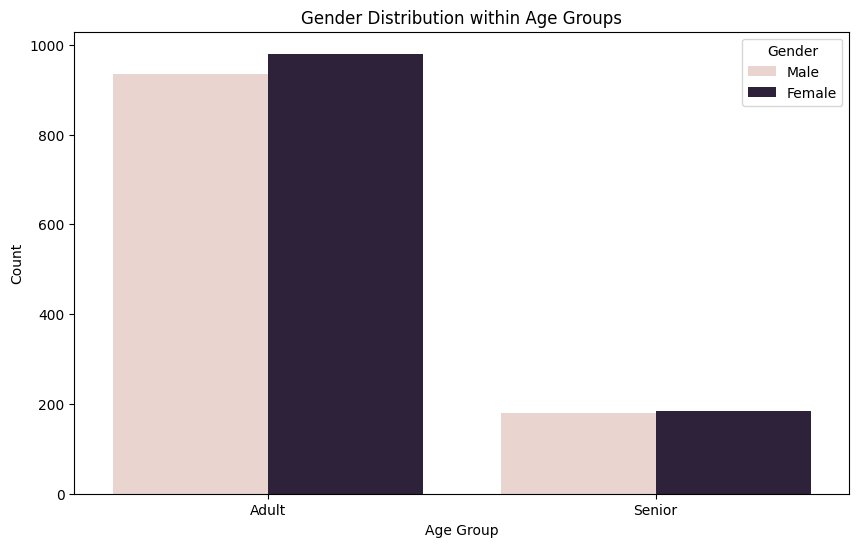

In [ ]:
#question 2: How does the gender distribution vary across different age groups?
# 2. Gender Distribution within Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='RespondentGender')
plt.title('Gender Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

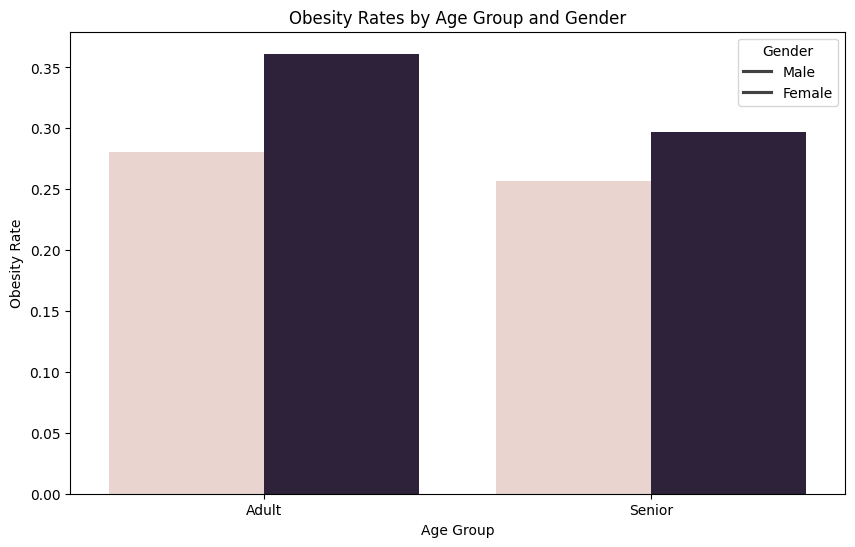

In [ ]:
#Question 3: What are the obesity rates by age group and gender?
# 3. Obesity Rates by Age Group and Gender
df['ObesityStatus'] = df['RespondentBMI'] >= 30
obesity_rates = df.groupby(['age_group', 'RespondentGender'])['ObesityStatus'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=obesity_rates, x='age_group', y='ObesityStatus', hue='RespondentGender')
plt.title('Obesity Rates by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Obesity Rate')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

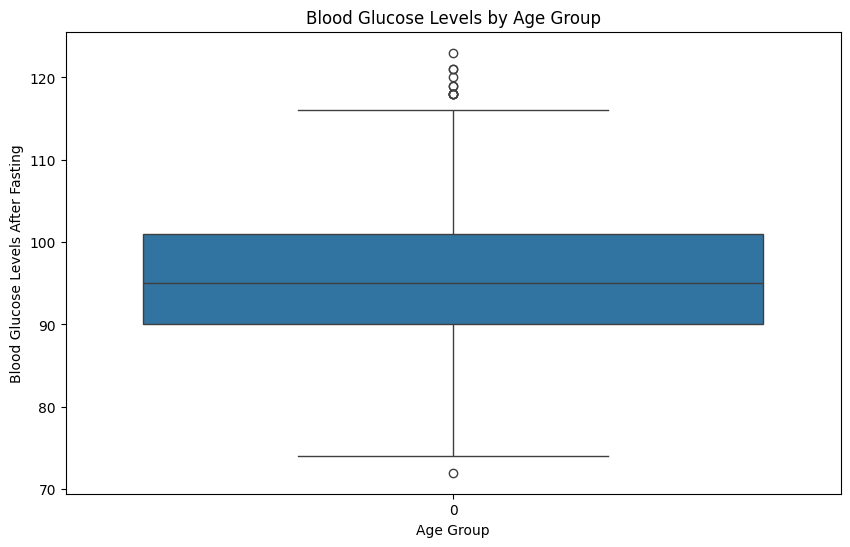

In [17]:
#question 4: How do blood glucose levels vary across different age groups?
# 4. Average Blood Glucose Levels by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='RespBloodGlucoseAfterFasting')
plt.title('Blood Glucose Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Blood Glucose Levels After Fasting')
plt.show()

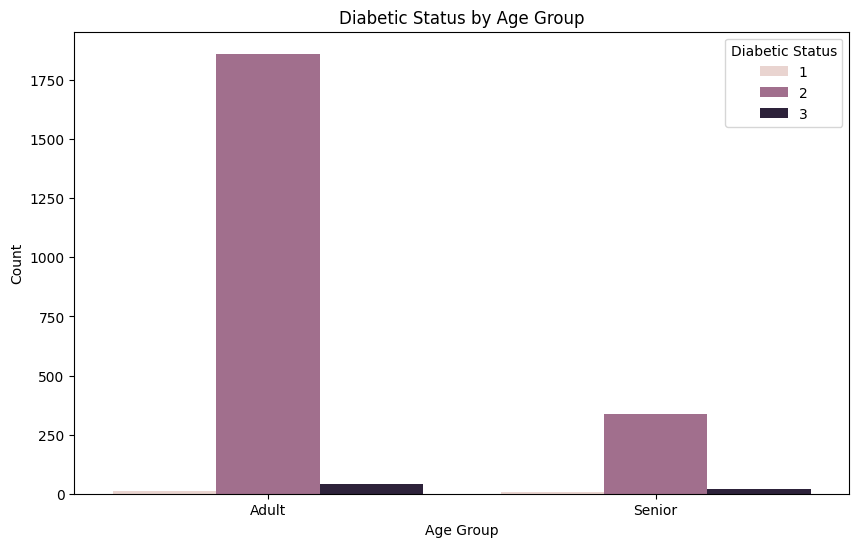

In [ ]:
#question 5: What is the diabetic status distribution across different age groups?
# 5. Diabetic Status by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='DiabeticStatus')
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetic Status')
plt.show()


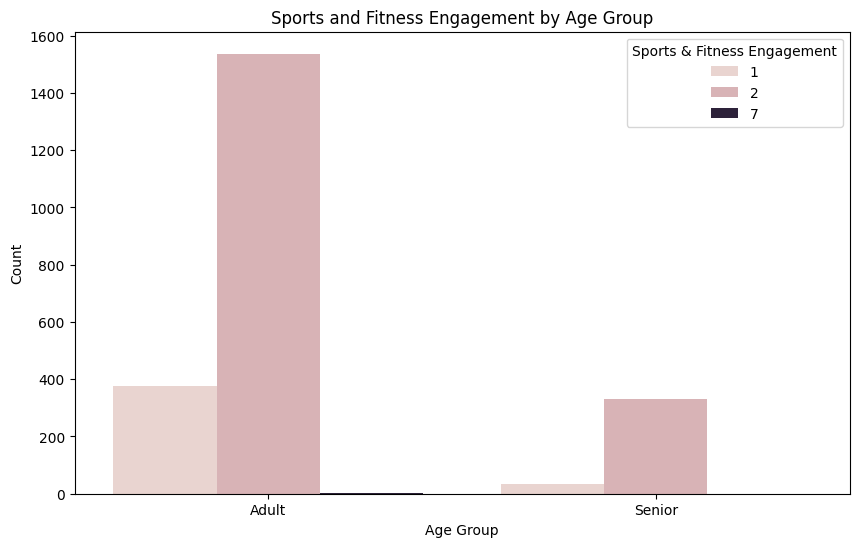

In [ ]:
#question 6: How does engagement in sports and fitness activities vary by age group?
# 6. Sports and Fitness Engagement by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='Sports&FitnessEngagement')
plt.title('Sports and Fitness Engagement by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sports & Fitness Engagement')
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df[['RespondentGender', 'Sports&FitnessEngagement', 'RespondentBMI',
        'RespBloodGlucoseAfterFasting', 'DiabeticStatus', 'RespondentOral', 'RespBloodInsulinLevels']]

y = df['RespondentAge']  # Target variable (age)


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 1822
Test set size: 456


In [ ]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error: 280.2511221491228
Root Mean Squared Error: 16.740702558409033
R-squared: 0.328198630027452


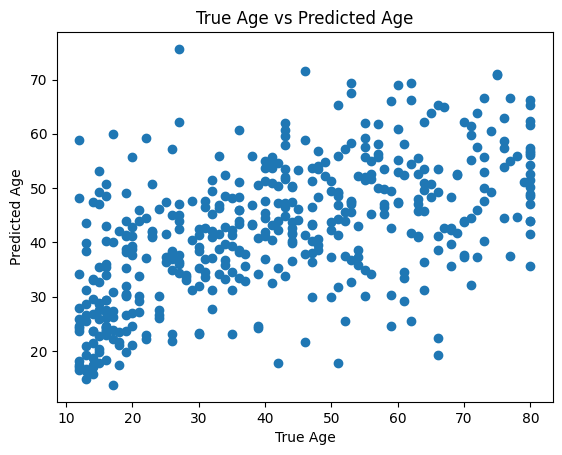

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True Age vs Predicted Age')
plt.show()


                        Feature  Importance
5                RespondentOral    0.276316
6        RespBloodInsulinLevels    0.255999
2                 RespondentBMI    0.244622
3  RespBloodGlucoseAfterFasting    0.174763
0              RespondentGender    0.023256
1      Sports&FitnessEngagement    0.018680
4                DiabeticStatus    0.006363


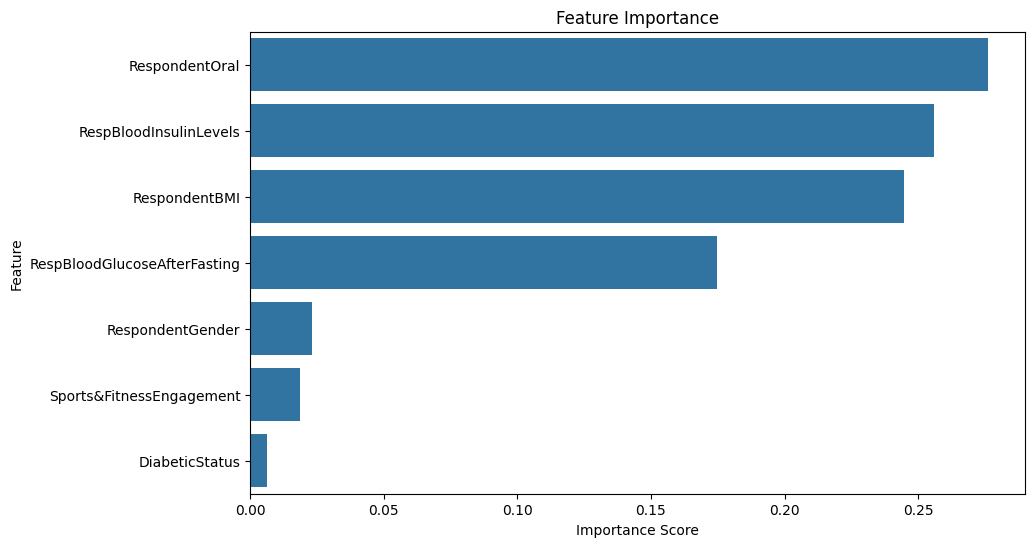

In [ ]:
# Get feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame to pair feature names with importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Visualize the feature importance using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


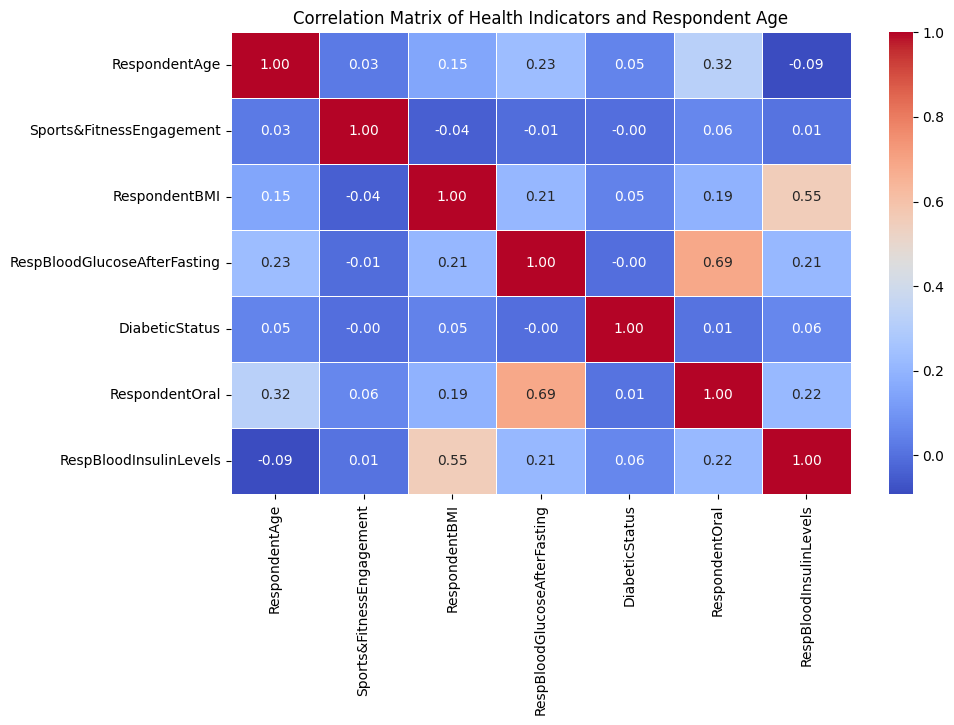

In [ ]:
# Select relevant columns for correlation
correlation_data = df[['RespondentAge', 'Sports&FitnessEngagement', 'RespondentBMI',
                         'RespBloodGlucoseAfterFasting', 'DiabeticStatus',
                         'RespondentOral', 'RespBloodInsulinLevels']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators and Respondent Age')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Handling missing values (if any)
# Here we use SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode target variable
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])

# Identify categorical features, excluding the target variable 'age_group'
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'age_group']

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X = df.drop('age_group', axis=1)
y = df['age_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Handling missing values (if any)
# Here we use SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode target variable
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])

# Identify categorical features, excluding the target variable 'age_group'
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'age_group']

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X = df.drop('age_group', axis=1)
y = df['age_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define categorical columns for OneHotEncoder
categorical_cols = ['RespondentGender', 'Sports&FitnessEngagement']  # Adjust as needed

# Define preprocessor: OneHotEncoder for categorical columns, pass-through for others
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', X.columns.difference(categorical_cols))
    ])

# Check if preprocessing is working as expected
X_train_transformed = preprocessor.fit_transform(X_train)
print(X_train_transformed.shape)  # Check that the transformation works


(1822, 13)


In [ ]:
# Convert columns to appropriate data types if necessary
df['RespondentBMI'] = pd.to_numeric(df['RespondentBMI'], errors='coerce')


In [ ]:
# Create a pipeline that first applies the preprocessor, then fits a RandomForest or XGBoost model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42))  # You can also use RandomForestClassifier here
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
#model_pipeline.fit(X_train, y_train)
model_pipeline.fit(X_train, y_train)
# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

# Assuming you have your data as a DataFrame `data`
# Define the features (X) and target (y)
X = df.drop(['age_group'], axis=1)  # Features
y = df['age_group']  # Target variable

# Convert categorical labels (like 'Adult' and 'Senior') to numeric labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check the transformed labels
print("Transformed y_train values:", y[:10])  # Print the first 10 labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing and model pipeline
model_pipeline = Pipeline(steps=[('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['RespondentGender', 'Sports&FitnessEngagement']),
            ('num', 'passthrough', ['DiabeticStatus', 'RespBloodGlucoseAfterFasting',
                                    'RespBloodInsulinLevels', 'RespondentAge', 'RespondentBMI',
                                    'RespondentOral', 'SequenceNo'])])),
    ('classifier', XGBClassifier(random_state=42))])

# Fit the model with the training data
model_pipeline.fit(X_train, y_train)

# Check the model's performance
print(f"Model accuracy: {model_pipeline.score(X_test, y_test)}")


Transformed y_train values: [0 0 0 0 0 0 0 0 1 0]
Model accuracy: 1.0


In [ ]:
# Create pipelines for each model

# Logistic Regression
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Gradient Boosting
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
])

# Dictionary of models to evaluate
models = {
    "Logistic Regression": log_reg_pipeline,
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline,
    "XGBoost": xgb_pipeline
}

# Evaluate each model
for model_name, model_pipeline in models.items():
    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9868421052631579
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.95      0.97      0.96        74

    accuracy                           0.99       456
   macro avg       0.97      0.98      0.98       456
weighted avg       0.99      0.99      0.99       456

------------------------------------------------------------
Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

------------------------------------------------------------
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
          

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:41:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_], output_dict=True)
    results[name] = {
        'accuracy': accuracy,
        'report': report
    }
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_]))

# Find the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model} with Accuracy: {results[best_model]['accuracy']}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.95      0.97      0.96        74

    accuracy                           0.99       456
   macro avg       0.97      0.98      0.98       456
weighted avg       0.99      0.99      0.99       456

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weigh

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_], output_dict=True)
    results[name] = {
        'accuracy': accuracy,
        'report': report
    }
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_]))

# Find the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model} with Accuracy: {results[best_model]['accuracy']}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.95      0.97      0.96        74

    accuracy                           0.99       456
   macro avg       0.97      0.98      0.98       456
weighted avg       0.99      0.99      0.99       456

Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       382
           1       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weigh

After training and evaluating four different models (Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting), the Decision Tree model was selected as the best model for predicting the age group in the NHANES dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, make_scorer
import numpy as np




# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Create pipelines for each model
pipelines = {
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))
    ])
}

# Function to evaluate a model
def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    # Train the model
    pipeline.fit(X_train, y_train)
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    # Convert classification report to DataFrame for easier comparison
    report_df = pd.DataFrame(report).transpose()
    return accuracy, report_df

# Evaluate each model and store results
results = {}
for model_name, model_pipeline in pipelines.items():
    accuracy, report_df = evaluate_model(model_pipeline, X_train, y_train, X_test, y_test)
    results[model_name] = {'accuracy': accuracy, 'report': report_df}

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics['report'])
    print("-" * 60)

# Perform cross-validation for robustness
cross_val_results = {}
scorer = make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
for model_name, model_pipeline in pipelines.items():
    scores = cross_val_score(model_pipeline, X, y, cv=5, scoring=scorer)
    cross_val_results[model_name] = scores
    print(f"Model: {model_name} - Cross-Validation AUC-ROC Scores: {scores}")
    print(f"Mean AUC-ROC: {scores.mean():.4f} - Std: {scores.std():.4f}")
    print("-" * 60)

    # Find the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model} with Accuracy: {results[best_model]['accuracy']}")



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Logistic Regression
Accuracy: 0.9803
Classification Report:
              precision    recall  f1-score     support
0              0.977041  1.000000  0.988387  383.000000
1              1.000000  0.876712  0.934307   73.000000
accuracy       0.980263  0.980263  0.980263    0.980263
macro avg      0.988520  0.938356  0.961347  456.000000
weighted avg   0.980716  0.980263  0.979729  456.000000
------------------------------------------------------------
Model: Decision Tree
Accuracy: 1.0000
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0    383.0
1                   1.0     1.0       1.0     73.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    456.0
weighted avg        1.0     1.0       1.0    456.0
------------------------------------------------------------
Model: Random Forest
Accuracy: 0.9978
Classification Report:
              precision    recall  f1-score    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Model: Logistic Regression - Cross-Validation AUC-ROC Scores: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000 - Std: 0.0000
------------------------------------------------------------
Model: Decision Tree - Cross-Validation AUC-ROC Scores: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000 - Std: 0.0000
------------------------------------------------------------
Model: Random Forest - Cross-Validation AUC-ROC Scores: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000 - Std: 0.0000
------------------------------------------------------------
Model: Gradient Boosting - Cross-Validation AUC-ROC Scores: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000 - Std: 0.0000
------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:44:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Model: XGBoost - Cross-Validation AUC-ROC Scores: [0.96997389 0.97700204 0.9408956  0.996283   0.97149107]
Mean AUC-ROC: 0.9711 - Std: 0.0178
------------------------------------------------------------
Best Model: Decision Tree with Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from joblib import dump, load
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
data = pd.read_csv('/content/NHANES.csv')

# Define the target variable
target_column = 'age_group'  # Replace with your actual target column name

# Ensure the target column is categorical (if not, convert it to categorical)
if df[target_column].dtype != 'category':
    df[target_column] = df[target_column].astype('category')

# Define features (excluding the target variable)
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Create the final Decision Tree pipeline
final_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the final model on the entire training set
final_model_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = final_model_pipeline.predict(X_test)
print("Final Model Evaluation on Test Set")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Save the trained model for future use
dump(final_model_pipeline, 'final_decision_tree_model.joblib')

# To load the model later and make predictions:
# final_model_pipeline = load('final_decision_tree_model.joblib')

# Example of making predictions on new data
# new_data = pd.read_csv('new_data.csv')  # Load new data
# predictions = final_model_pipeline.predict(new_data)
# print(predictions)


Final Model Evaluation on Test Set
              precision    recall  f1-score   support

       Adult       1.00      1.00      1.00       383
      Senior       1.00      1.00      1.00        73

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

Accuracy: 1.0000


['final_decision_tree_model.joblib']

In [ ]:
print(new_data.columns)


Index(['Age', 'RespondentGender', 'BMI', 'RespBloodGlucoseAfterFasting',
       'DiabeticStatus', 'RespondentOral', 'RespBloodInsulinLevels'],
      dtype='object')


In [ ]:
missing_columns = {'SequenceNo', 'Sports&FitnessEngagement', 'RespondentGender', 'RespondentBMI', 'RespondentAge', 'DiabeticStatus'}
new_data = new_data[list(new_data.columns.intersection(missing_columns))]


In [ ]:
missing_columns = ['SequenceNo', 'Sports&FitnessEngagement', 'RespondentGender', 'RespondentBMI', 'RespondentAge', 'DiabeticStatus']
for column in missing_columns:
    if column not in new_data.columns:
        new_data[column] = 0  # You can replace 0 with an appropriate default value or method


<ipython-input-129-545292f1d86b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column] = 0  # You can replace 0 with an appropriate default value or method
<ipython-input-129-545292f1d86b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column] = 0  # You can replace 0 with an appropriate default value or method
<ipython-input-129-545292f1d86b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
columns_to_select = ['SequenceNo', 'Sports&FitnessEngagement', 'RespondentGender', 'RespondentBMI', 'RespondentAge', 'DiabeticStatus']
new_data = new_data[[col for col in columns_to_select if col in new_data.columns]]


In [ ]:
# Check if all the required columns are in new_data
required_columns = ['SequenceNo', 'Sports&FitnessEngagement', 'RespondentGender', 'RespondentBMI', 'RespondentAge', 'DiabeticStatus']
missing_columns = [col for col in required_columns if col not in new_data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
    # Optionally, add missing columns or handle them
    for col in missing_columns:
        new_data[col] = 0  # or use another strategy for missing values

# Now select the columns that are available
new_data = new_data[required_columns]


In [ ]:
new_data.columns = new_data.columns.str.strip()  # Remove leading/trailing spaces


In [ ]:
import pandas as pd
from joblib import load
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the trained model
final_model_pipeline = load('final_decision_tree_model.joblib')

# Function to get user input and convert it to a DataFrame
def get_user_input():
    # Example columns based on your dataset
    columns = ['Age', 'RespondentGender', 'BMI', 'RespBloodGlucoseAfterFasting', 'DiabeticStatus','RespondentOral','RespBloodInsulinLevels']  # Add your actual feature columns here
    user_data = {}

    for col in columns:
        user_data[col] = [input(f"Enter {col}: ")]

    return pd.DataFrame(user_data)

# Get user input
new_data = get_user_input()

# Make predictions

predictions = final_model_pipeline.predict(new_data)
# Output predictions
print(f"Predicted class: {predictions[0]}")

# If you want to output probabilities
pred_probabilities = final_model_pipeline.predict_proba(new_data)
print(f"Prediction probabilities: {pred_probabilities[0]}")


Enter Age: 25
Enter RespondentGender: 1
Enter BMI: 34
Enter RespBloodGlucoseAfterFasting: 45
Enter DiabeticStatus: 65
Enter RespondentOral: 54
Enter RespBloodInsulinLevels: 66


ValueError: columns are missing: {'SequenceNo', 'Sports&FitnessEngagement', 'RespondentBMI', 'RespondentAge'}

In [ ]:
import pandas as pd

# Step 1: Check the shape of the new_data
print(f"Shape of new_data: {new_data.shape}")

# Step 2: Check if there are missing values in new_data
missing_values = new_data.isnull().sum()
print(f"Missing values in new_data:\n{missing_values}")

# Step 3: Check the data types of each column
print(f"Data types in new_data:\n{new_data.dtypes}")

# Step 4: Ensure column names match exactly as expected by the trained model (optional, based on your model)
expected_columns = ['SequenceNo', 'Sports&FitnessEngagement', 'RespondentGender', 'RespondentBMI', 'RespondentAge', 'DiabeticStatus']
missing_columns = [col for col in expected_columns if col not in new_data.columns]
if missing_columns:
    print(f"Missing columns in new_data: {missing_columns}")
    # Optionally, add missing columns with default values (e.g., 0 or NaN)
    for col in missing_columns:
        new_data[col] = 0  # You can replace 0 with another default value or impute if applicable
else:
    print(f"All expected columns are present in new_data.")

# Step 5: Check if the columns in new_data are in the same order as expected by the trained model
# This step is important if you’re manually manipulating the columns
new_data = new_data[expected_columns]  # Reorder columns to match expected order (if necessary)

# Step 6: Handle missing values (if any), impute or remove them
if missing_values.any():
    print("Handling missing values...")
    new_data = new_data.fillna(0)  # Replace missing values with 0, or use another strategy

# Step 7: Ensure data types are correct for model prediction
# If any columns should be numerical but are strings, convert them to numeric values
# Example for converting columns that should be numeric:
new_data['RespondentBMI'] = pd.to_numeric(new_data['RespondentBMI'], errors='coerce')  # Replace errors with NaN if any

# Step 8: Perform prediction using the pipeline
try:
    predictions = final_model_pipeline.predict(new_data)
    print(f"Predictions:\n{predictions}")
except Exception as e:
    print(f"Error during prediction: {e}")


Shape of new_data: (1, 7)
Missing values in new_data:
Age                             0
RespondentGender                0
BMI                             0
RespBloodGlucoseAfterFasting    0
DiabeticStatus                  0
RespondentOral                  0
RespBloodInsulinLevels          0
dtype: int64
Data types in new_data:
Age                             object
RespondentGender                object
BMI                             object
RespBloodGlucoseAfterFasting    object
DiabeticStatus                  object
RespondentOral                  object
RespBloodInsulinLevels          object
dtype: object
Missing columns in new_data: ['SequenceNo', 'Sports&FitnessEngagement', 'RespondentBMI', 'RespondentAge']
Error during prediction: columns are missing: {'RespondentOral', 'RespBloodGlucoseAfterFasting', 'RespBloodInsulinLevels'}


<ipython-input-134-219d3974dbff>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['RespondentBMI'] = pd.to_numeric(new_data['RespondentBMI'], errors='coerce')  # Replace errors with NaN if any


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Create the LIME explainer
explainer = LimeTabularExplainer(X.values, feature_names=X.columns,
                                 class_names=['Class 0', 'Class 1'],
                                 mode='classification')

# Select an instance to explain (e.g., the first row in the test set)
instance = X.iloc[0]

# Generate an explanation for this instance
explanation = explainer.explain_instance(instance.values, model.predict_proba)

# Show the explanation in a notebook
explanation.show_in_notebook()


ModuleNotFoundError: No module named 'lime'

In [ ]:
pip install lime scikit-learn matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0ce49a986a7702040f99ec3bac988c92a1cc4e0adf0cd6408627b0daf1443982
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


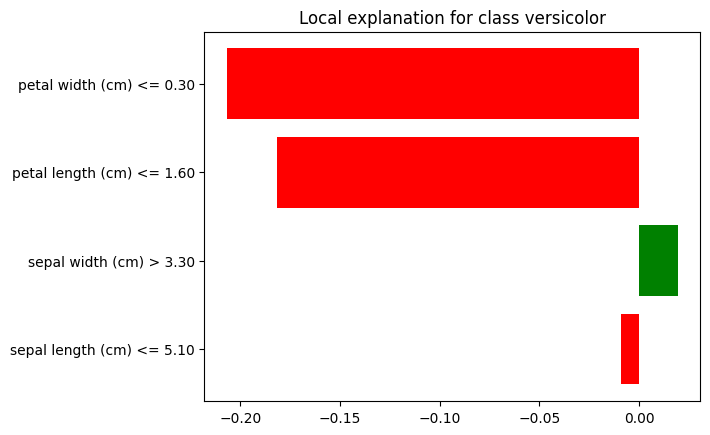

In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load your NHANES dataset (replace this with actual dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Create a LimeTabularExplainer instance
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,  # Use the feature data
    training_labels=y,       # Use the labels
    mode="classification",   # Mode: classification problem
    feature_names=X.columns, # Feature names from your dataset
    class_names=data.target_names,  # Class names (obesity categories)
    discretize_continuous=True  # Discretize continuous variables
)

# Choose an instance from the dataset to explain (e.g., the first instance)
idx = 0
exp = explainer.explain_instance(X.iloc[idx].values, model.predict_proba)

# Plot the explanation
exp.as_pyplot_figure()
plt.show()


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Initialize the LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # Use the training data
    training_labels=y_train,  # Use the labels
    mode="classification",  # Mode: classification problem
    feature_names=['Age', 'Income', 'Physical_Activity', 'Blood_Pressure'],  # Feature names
    class_names=['Non-Obese', 'Obese'],  # Class names (adjust based on the target variable)
    discretize_continuous=True  # Discretize continuous variables
)

# Choose an instance from the test set to explain (e.g., the first instance)
idx = 0  # You can change this to any index of the test set
exp = explainer.explain_instance(X_test[idx], model.predict_proba)

# Plot the explanation
exp.as_pyplot_figure()
plt.show()


InvalidIndexError: (slice(None, None, None), 0)